# Pneumonia Detection using CNN -- Transfer Learning model



```
อันนี้คืออันที่ใช้ Transfer Learning แต่ใช้ข้อมูลที่เท่ากัน แล้วทำ augmentation ด้วย

1. VGG16

2. ResNet50

3. DenseNet121


```




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
import seaborn as sns

## 1. **Data exploration** 📊

**❗❓หมายเหตุ:**

ข้อมูล DataFrame ทั้งหมด ใน 1. Data exploration นี้ ใช้เฉพาะการ Data exploration เท่านั้นนะคะ ไม่ได้ใช้สำหรับการ Preprocess data และ Train Model

### 1.1 Training set

#### Normal train set




In [ ]:
normal_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_train_directory
normal_train_images = os.listdir(normal_train_directory)

normal_train_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_train_images:
  normal_train_label.append('Normal')

# สร้าง dataframe ของ normal_train_df
normal_train_df = pd.DataFrame({
    'image': normal_train_images,
    'label': normal_train_label
})

normal_train_df.sample(5)

,image,label
977,NORMAL2-IM-1347-0001.jpeg,Normal
82,IM-0617-0001.jpeg,Normal
330,NORMAL2-IM-0479-0001.jpeg,Normal
1183,IM-0386-0001.jpeg,Normal
914,NORMAL2-IM-1278-0001.jpeg,Normal


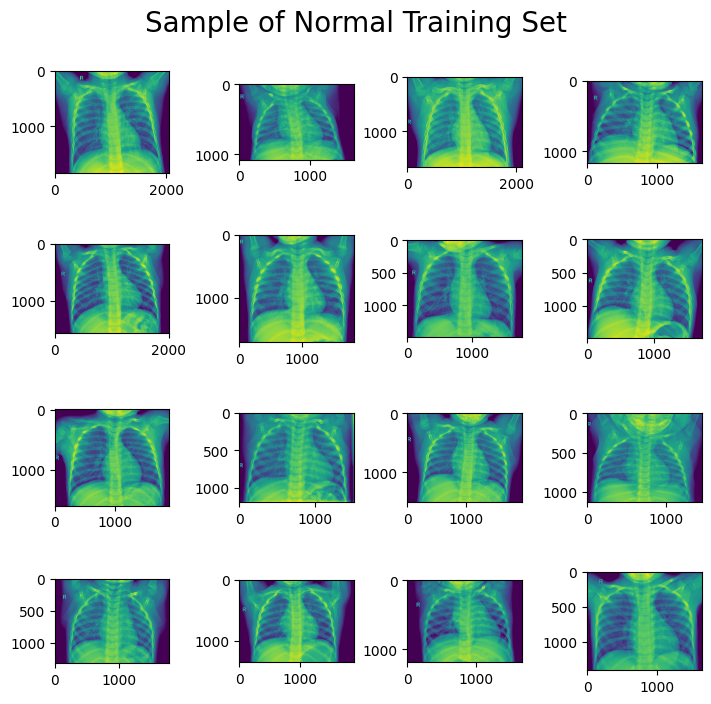

In [ ]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [ ]:
pneumonia_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_train_directory
pneumonia_train_images = os.listdir(pneumonia_train_directory)

pneumonia_train_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_train_images:
  pneumonia_train_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_train_df
pneumonia_train_df = pd.DataFrame({
    'image': pneumonia_train_images,
    'label': pneumonia_train_label
})

pneumonia_train_df.sample(5)

,image,label
848,person5_bacteria_16.jpeg,Pneumonia
235,person349_virus_724.jpeg,Pneumonia
1053,person126_virus_255.jpeg,Pneumonia
305,person382_bacteria_1741.jpeg,Pneumonia
971,person88_virus_161.jpeg,Pneumonia


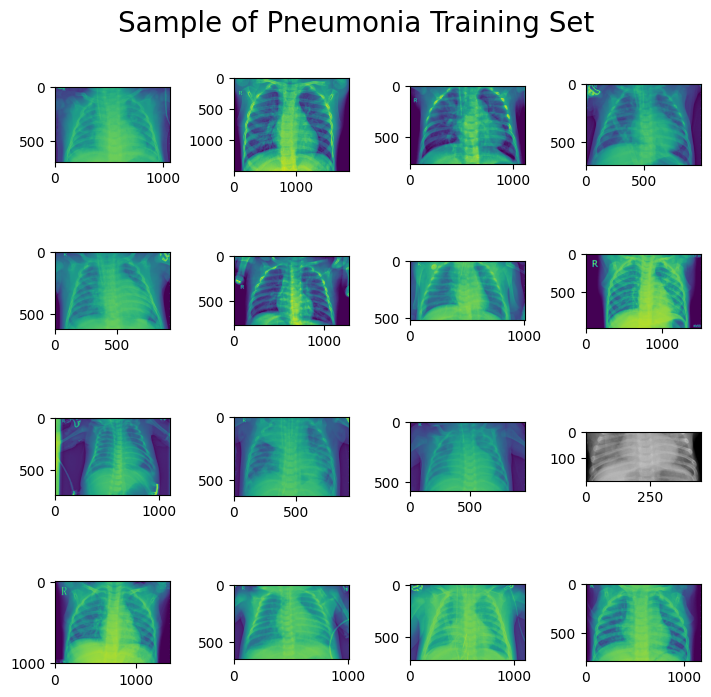

In [ ]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [ ]:
print('Total Normal and Pneumonia training set image: ',  int(normal_train_df['label'].value_counts()) +  int(pneumonia_train_df['label'].value_counts()))

Total Normal and Pneumonia training set image:  2680


In [ ]:
train_df =  pd.concat([normal_train_df, pneumonia_train_df])
train_df

,image,label
0,IM-0511-0001.jpeg,Normal
1,IM-0522-0001.jpeg,Normal
2,IM-0517-0001-0001.jpeg,Normal
3,IM-0523-0001-0003.jpeg,Normal
4,IM-0519-0001-0002.jpeg,Normal
...,...,...
1335,person281_virus_578.jpeg,Pneumonia
1336,person301_bacteria_1427.jpeg,Pneumonia
1337,person279_bacteria_1315.jpeg,Pneumonia
1338,person296_bacteria_1391.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of training set image')]

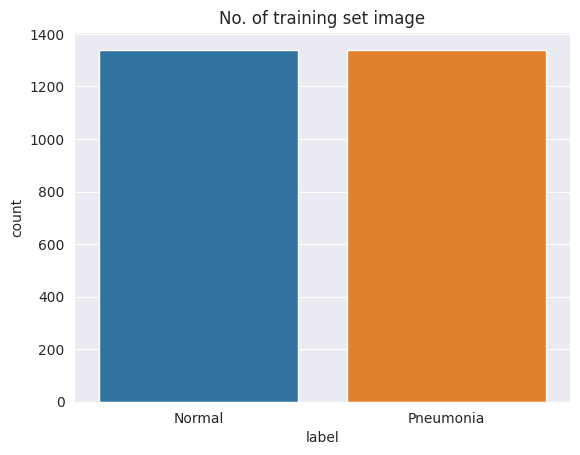

In [ ]:
sns.set_style('darkgrid')
sns.countplot(train_df, x="label").set(title='No. of training set image')

ใน training set ทั้งสอง class มีจำนวนรูปภาพเท่ากัน

### 1.2 Test set

#### Normal test set




In [ ]:
normal_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_test_directory
normal_test_images = os.listdir(normal_test_directory)

normal_test_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_test_images:
  normal_test_label.append('Normal')

# สร้าง dataframe ของ normal_test_df
normal_test_df = pd.DataFrame({
    'image': normal_test_images,
    'label': normal_test_label
})

normal_test_df.sample(5)

,image,label
47,NORMAL2-IM-0012-0001.jpeg,Normal
220,NORMAL2-IM-0349-0001.jpeg,Normal
22,IM-0028-0001.jpeg,Normal
100,NORMAL2-IM-0283-0001.jpeg,Normal
24,NORMAL2-IM-0023-0001.jpeg,Normal


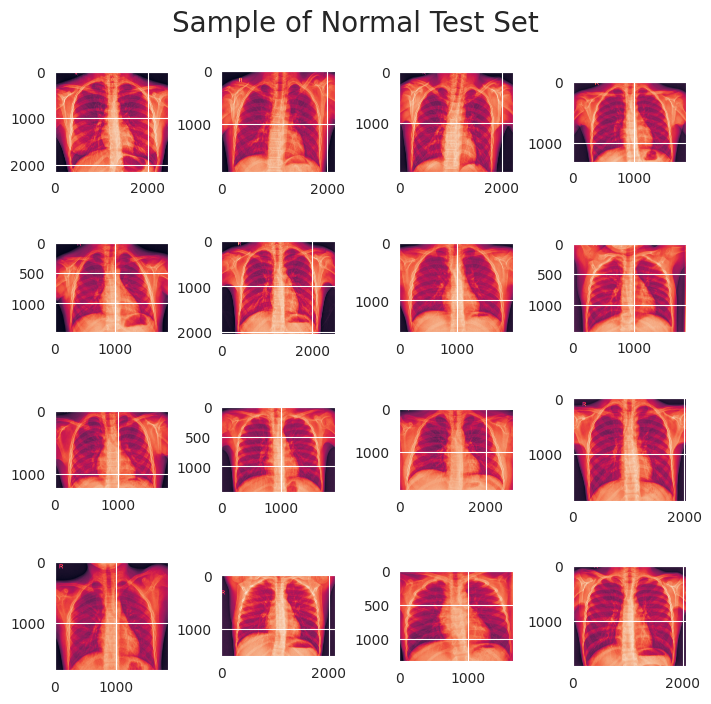

In [ ]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [ ]:
pneumonia_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_test_directory
pneumonia_test_images = os.listdir(pneumonia_test_directory)

pneumonia_test_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_test_images:
  pneumonia_test_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_test_df
pneumonia_test_df = pd.DataFrame({
    'image': pneumonia_test_images,
    'label': pneumonia_test_label
})

pneumonia_test_df.sample(5)

,image,label
239,person23_virus_56.jpeg,Pneumonia
81,person126_bacteria_599.jpeg,Pneumonia
69,person127_bacteria_604.jpeg,Pneumonia
71,person119_bacteria_565.jpeg,Pneumonia
18,person101_bacteria_483.jpeg,Pneumonia


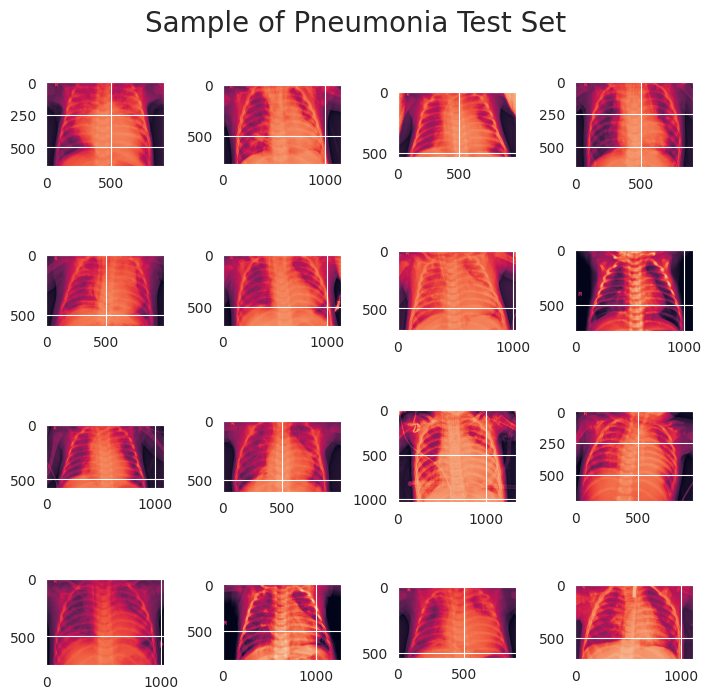

In [ ]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [ ]:
print('Total Normal and Pneumonia test set image: ',  int(normal_test_df['label'].value_counts()) +  int(pneumonia_test_df['label'].value_counts()))

Total Normal and Pneumonia test set image:  479


In [ ]:
test_df =  pd.concat([normal_test_df, pneumonia_test_df])
test_df

,image,label
0,IM-0013-0001.jpeg,Normal
1,IM-0011-0001-0001.jpeg,Normal
2,IM-0011-0001-0002.jpeg,Normal
3,IM-0001-0001.jpeg,Normal
4,IM-0010-0001.jpeg,Normal
...,...,...
240,person48_virus_100.jpeg,Pneumonia
241,person85_bacteria_421.jpeg,Pneumonia
242,person85_bacteria_419.jpeg,Pneumonia
243,person77_virus_139.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of test set image')]

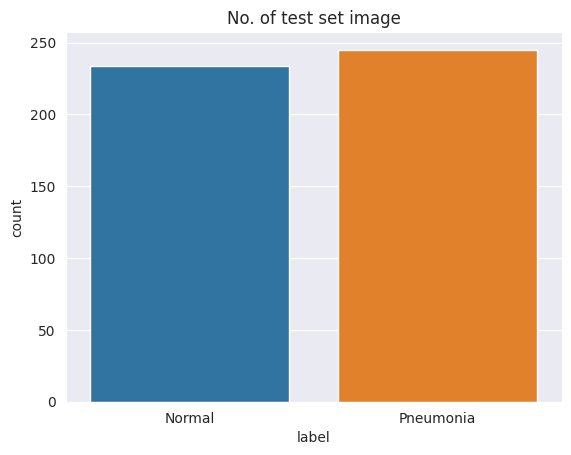

In [ ]:
sns.set_style('darkgrid')
sns.countplot(test_df, x="label").set(title='No. of test set image')

ส่วนใน test set pneumonia จะมีจำนวนมากกว่า normal เล็กน้อย

## **2. Transfer Learning 📦**

In [ ]:
target_img_shape=(64, 64) # ขนาดภาพ input เข้าสู่โมเดล (WxH)

in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

### VGG16

#### Preprocess data 📑

**ทำ data augmentation** โดยเพิ่มรายละเอียดใน ImageDataGenerator ดังต่อไปนี้ ซึ่งจะทำ data augmentation เฉพาะใน train set เท่านั้น ใน val set จะไม่ได้ทำ เพราะเราต้องการทดสอบกับข้อมูลจริง ๆ (real-word data)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
base_directory='/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/'

train_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/NORMAL/')
train_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/PNEUMONIA/')

val_dir_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/val/NORMAL/')
val_dir_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/val/PNEUMONIA/')

test_dir_normal=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/NORMAL/')
test_dir_pneumonia=os.listdir('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/PNEUMONIA/')

In [ ]:
train_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train'
val_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/val'
test_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test'

In [ ]:

train_datagen = ImageDataGenerator(rescale = 1./255, # กำหนด Normalize pixel
                                    rotation_range=10, # มุมหมุน +- 10
                                    width_shift_range=0.1, # ระเลื่อนแนวนอน +- 0.1
                                    height_shift_range=0.1, # ระเลื่อนแนวดิ่ง +- 0.1
                                    shear_range=0.1, # การเฉือน
                                    zoom_range=0.1, # ค่าซูม
                                    # horizontal_flip=True, # พลิกแนวนอน
                                    # fill_mode='nearest' # โหมดในการเติม pixel ภาพ
                                   )

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,
                                                 class_mode='binary')

Found 2680 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255) # กำหนด Normalize pixel
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 16 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255) # กำหนด Normalize pixel
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 479 images belonging to 2 classes.


In [ ]:
# สรุปแบบดูง่ายขึ้น
print('Training:')
ids, counts = np.unique(train_set.classes, return_counts=True)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Training:
NORMAL = 1340
PNEUMONIA = 1340


In [ ]:
# สรุปแบบดูง่ายขึ้น
print('Validation:')
ids, counts = np.unique(val_set.classes, return_counts=True)

labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Validation:
NORMAL = 8
PNEUMONIA = 8


In [ ]:
# สรุปแบบดูง่ายขึ้น
print('Test:')
ids, counts = np.unique(test_set.classes, return_counts=True)

labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

Test:
NORMAL = 234
PNEUMONIA = 245


##### plot ดู ภาพ

In [ ]:
train_set[0][0][0].shape

(64, 64, 3)

มีขนาด W,H = 64x64 และมี channel 3 (ภาพสี)

{'NORMAL': 0, 'PNEUMONIA': 1}
(32, 64, 64, 3)
(32,)
class: 1.0


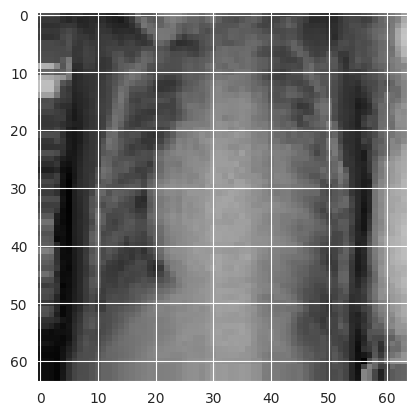

In [ ]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class:', labels_batch[0])

    break

แปล:

(32, 64, 64, 3) = ขนาด batch_size 32 ภาพ และภาพมีมิติ 64x64x3

(32,) = จำนวน label ใน batch ซึ่งจะเท่ากับ batch_size เลย

class: 1.0 = ภาพนี้อยู่ class 1 (PNEUMONIA)

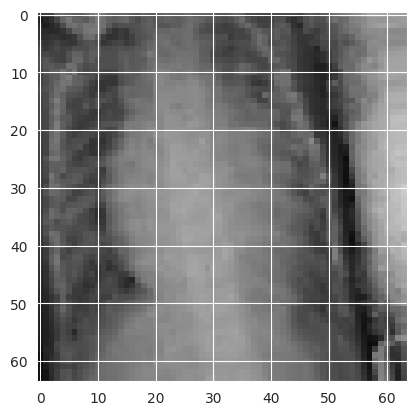

In [ ]:
plt.imshow(train_set[0][0][0]) # ดูภาพใน train_set
plt.show()

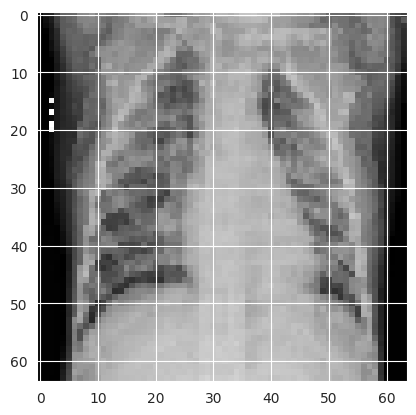

In [ ]:
plt.imshow(val_set[0][0][0]) # ดูภาพใน val_set
plt.show()

- ภาพที่ได้จากการทำ data augmentation

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(10,10))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

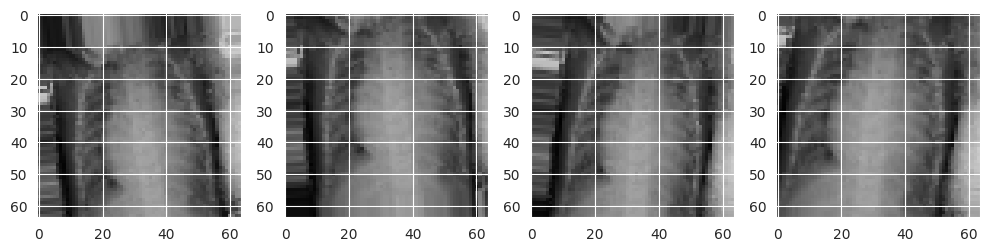

In [ ]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

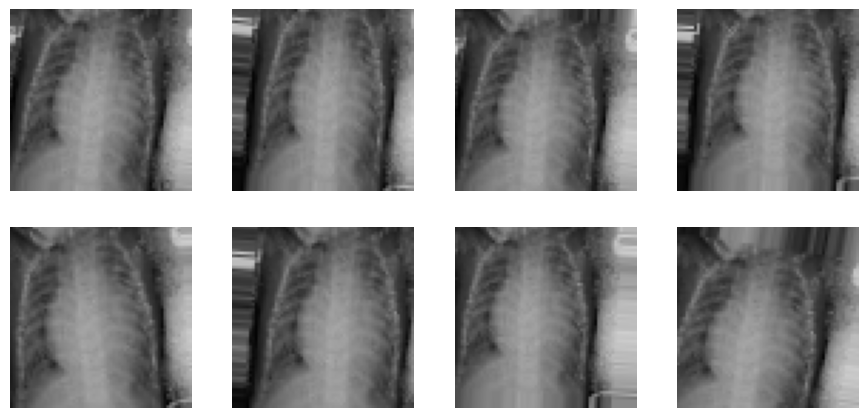

In [ ]:
nplots = 8 # จำนวนที่ต้องการ plot

# แบบดูหลายภาพ
def visual_multi(images_arr):
    fig = plt.figure(figsize=(11, 8))
    for j in range(nplots):

        plt.subplot(3, 4, j+1) # 3 row x 4 col
        plt.imshow(images_arr[j])

        plt.axis('off')

    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

#### Model

ใช้**วิธี Transfer Learning แบบ Feature Extractor**

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization

In [ ]:
vgg16_base_model = VGG16(input_shape= in_shape,
                         include_top=False,
                         weights='imagenet')

vgg16_base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
model = Sequential() # เริ่ม model

model.add(vgg16_base_model) # ใส่ base_model จากด้านบนเป็นฐาน
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # ใส่ส่วน top ที่ต้องการ
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14977089 (57.13 MB)
Trainable params: 14977089 (57.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# ตรวจสอบว่า layer ใด ที่สามารถ train ได้บ้าง
for layer in model.layers:
    print('{:12} {}'.format(layer.name, layer.trainable))

vgg16        True
flatten      True
dense        True
dense_1      True


In [ ]:
for layer in vgg16_base_model.layers:
    print('{:13} {}'.format(layer.name, layer.trainable))

input_1       True
block1_conv1  True
block1_conv2  True
block1_pool   True
block2_conv1  True
block2_conv2  True
block2_pool   True
block3_conv1  True
block3_conv2  True
block3_conv3  True
block3_pool   True
block4_conv1  True
block4_conv2  True
block4_conv3  True
block4_pool   True
block5_conv1  True
block5_conv2  True
block5_conv3  True
block5_pool   True


In [ ]:
# ต้องการล็อคทุกชั้น layer ใน VGG (base_model) ไม่ให้ train ได้ (ล็อกส่วนที่เป็น Feature Extractor) เรียกว่า ทำการ Freeze หรือล็อก layer
vgg16_base_model.trainable = False # Freeze

In [ ]:
# แสดง layer ที่ train ได้ทั้งหมดมา (อีกรอบ)
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)

Trainable..
---
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


จะพบว่าเหลือชั้น Classification (dense) ที่เราใส่เพิ่มเข้าไปเท่านั้น ที่สามารถ Train ได้

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14977089 (57.13 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
        ]


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=METRICS)

In [ ]:
import time
from keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

start = time.time()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) # patience=2 หยุดตั้งแต่ 2 ครั้งแรกถ้าปรับแล้ว loss ไม่ดีขึ้นเลย
mc = ModelCheckpoint('VGG16_pneumonia.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

history = model.fit(train_set, steps_per_epoch=len(train_set),
          epochs=20,
          validation_data=test_set,
          verbose=1,
          callbacks=[early_stop, mc])
          # class_weight=class_weights


end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.8672 - precision: 0.8756 - recall: 0.8560
Epoch 1: val_accuracy improved from -inf to 0.87265, saving model to VGG16_pneumonia.h5
84/84 [==============================] - 234s 3s/step - loss: 0.3019 - accuracy: 0.8672 - precision: 0.8756 - recall: 0.8560 - val_loss: 0.3342 - val_accuracy: 0.8727 - val_precision: 0.8898 - val_recall: 0.8571


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.1954 - accuracy: 0.9228 - precision: 0.9315 - recall: 0.9127
Epoch 2: val_accuracy did not improve from 0.87265
84/84 [==============================] - 229s 3s/step - loss: 0.1954 - accuracy: 0.9228 - precision: 0.9315 - recall: 0.9127 - val_loss: 0.3405 - val_accuracy: 0.8664 - val_precision: 0.8198 - val_recall: 0.9469
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.1728 - accuracy: 0.9373 - precision: 0.9439 - recall: 0.9299
Epoch 3: val_accuracy did not improve from 0.87265
84/84 [==============================] - 220s 3s/step - loss: 0.1728 - accuracy: 0.9373 - precision: 0.9439 - recall: 0.9299 - val_loss: 0.3168 - val_accuracy: 0.8727 - val_precision: 0.8382 - val_recall: 0.9306
Epoch 4/20
84/84 [==============================] - ETA: 0s - loss: 0.1589 - accuracy: 0.9410 - precision: 0.9518 - recall: 0.9291
Epoch 4: val_accuracy did not improve from 0.87265
84/84 [=======================

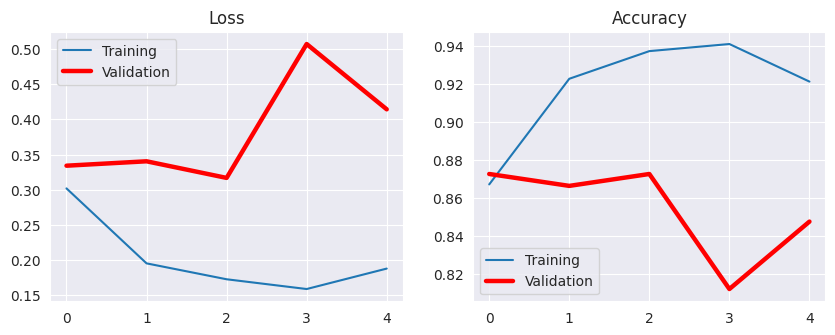

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [ ]:
predict=model.evaluate(test_set)

15/15 [==============================] - 53s 4s/step - loss: 0.3342 - accuracy: 0.8727 - precision: 0.8898 - recall: 0.8571


In [ ]:
# model.save('VGG16_pneumonia.h5')

#### ลองทำนายรูปจากทั้ง folder

ภาพที่จะลองมีทั้งหมด 16 ภาพ ประกอบด้วย normal มี 8 ภาพ และ pneumonia มี 8 ภาพ (มาจาก folder val ของชุดข้อมูลนี้)

In [ ]:
from keras import models
from keras.models import Sequential, Model

model = models.load_model('/content/VGG16_pneumonia.h5') # Load model มาใช้ต่อ

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_chest_xray(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:

        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0


        img_lst.append(img)

        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = 'PNEUMONIA' if y_pred_i > 0.5 else 'NORMAL' # threshold 0.5

        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

In [ ]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/PNEUMONIA/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 72ms/step
person1952_bacteria_4883.jpeg | person1951_bacteria_4882.jpeg | person1954_bacteria_4886.jpeg | person1946_bacteria_4875.jpeg | person1947_bacteria_4876.jpeg | person1950_bacteria_4881.jpeg | person1949_bacteria_4880.jpeg | person1946_bacteria_4874.jpeg | 

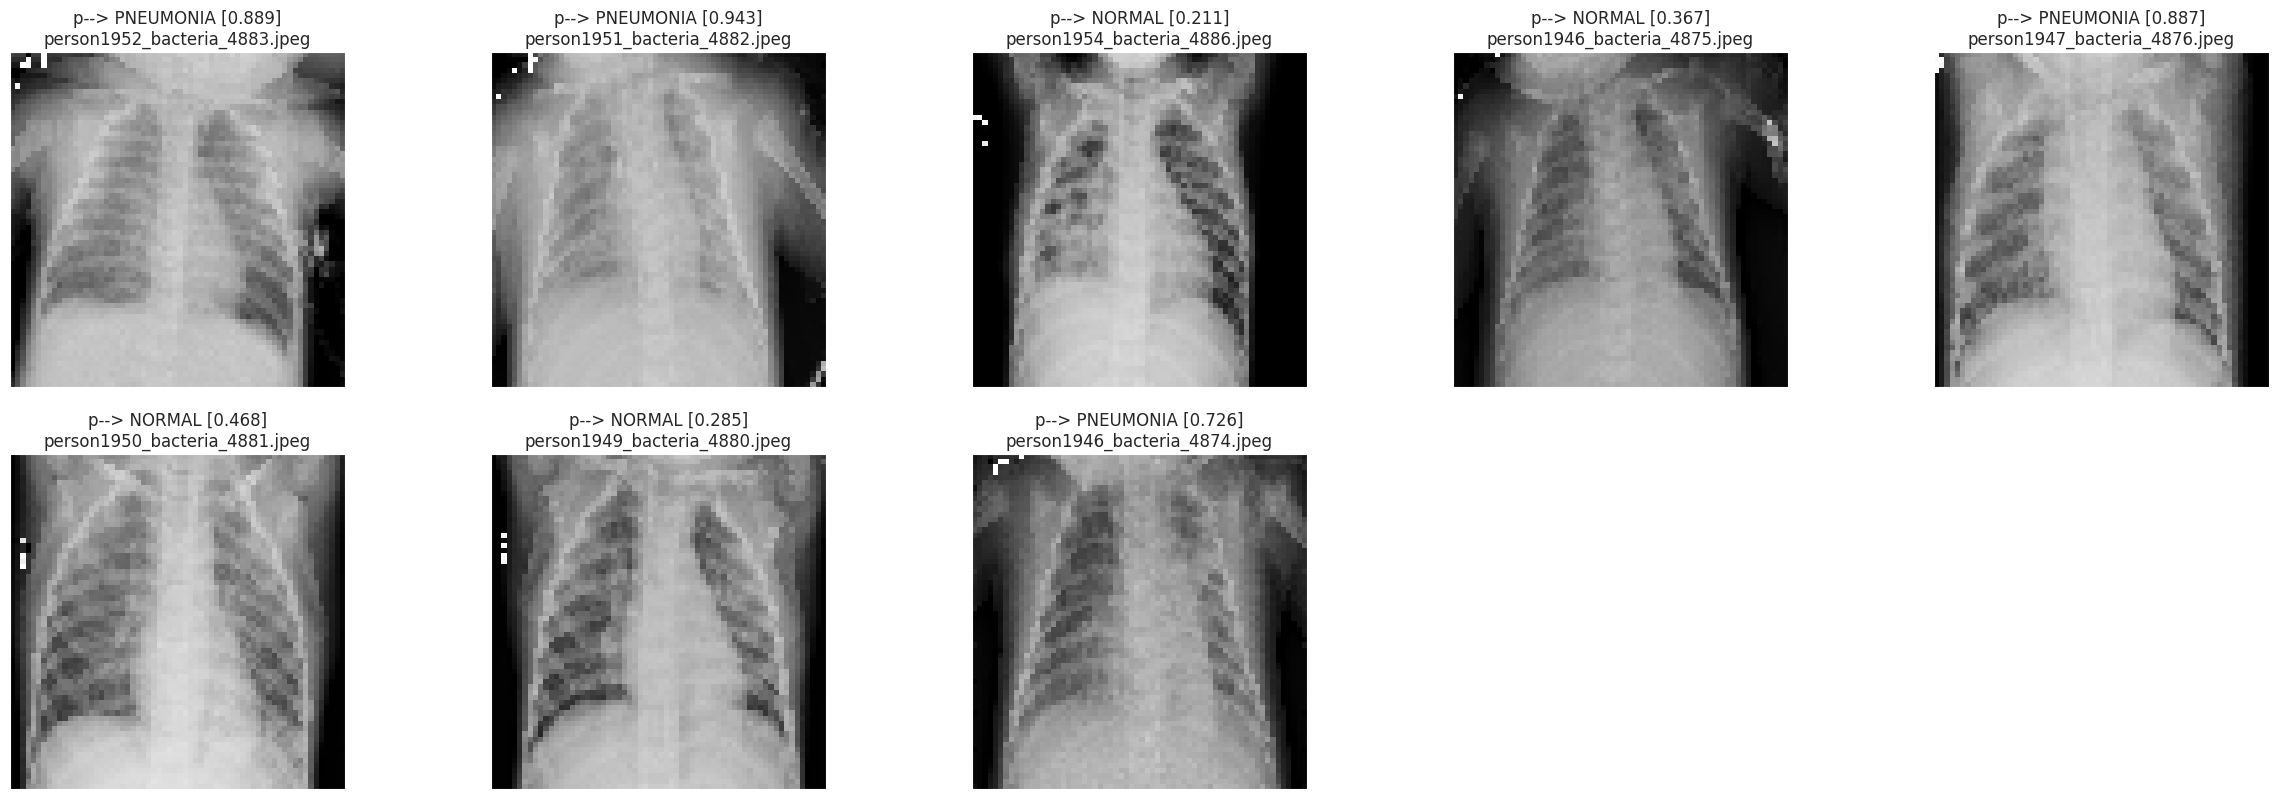

In [ ]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

In [ ]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/NORMAL/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 68ms/step
NORMAL2-IM-1440-0001.jpeg | NORMAL2-IM-1438-0001.jpeg | NORMAL2-IM-1437-0001.jpeg | NORMAL2-IM-1436-0001.jpeg | NORMAL2-IM-1431-0001.jpeg | NORMAL2-IM-1430-0001.jpeg | NORMAL2-IM-1427-0001.jpeg | NORMAL2-IM-1442-0001.jpeg | 

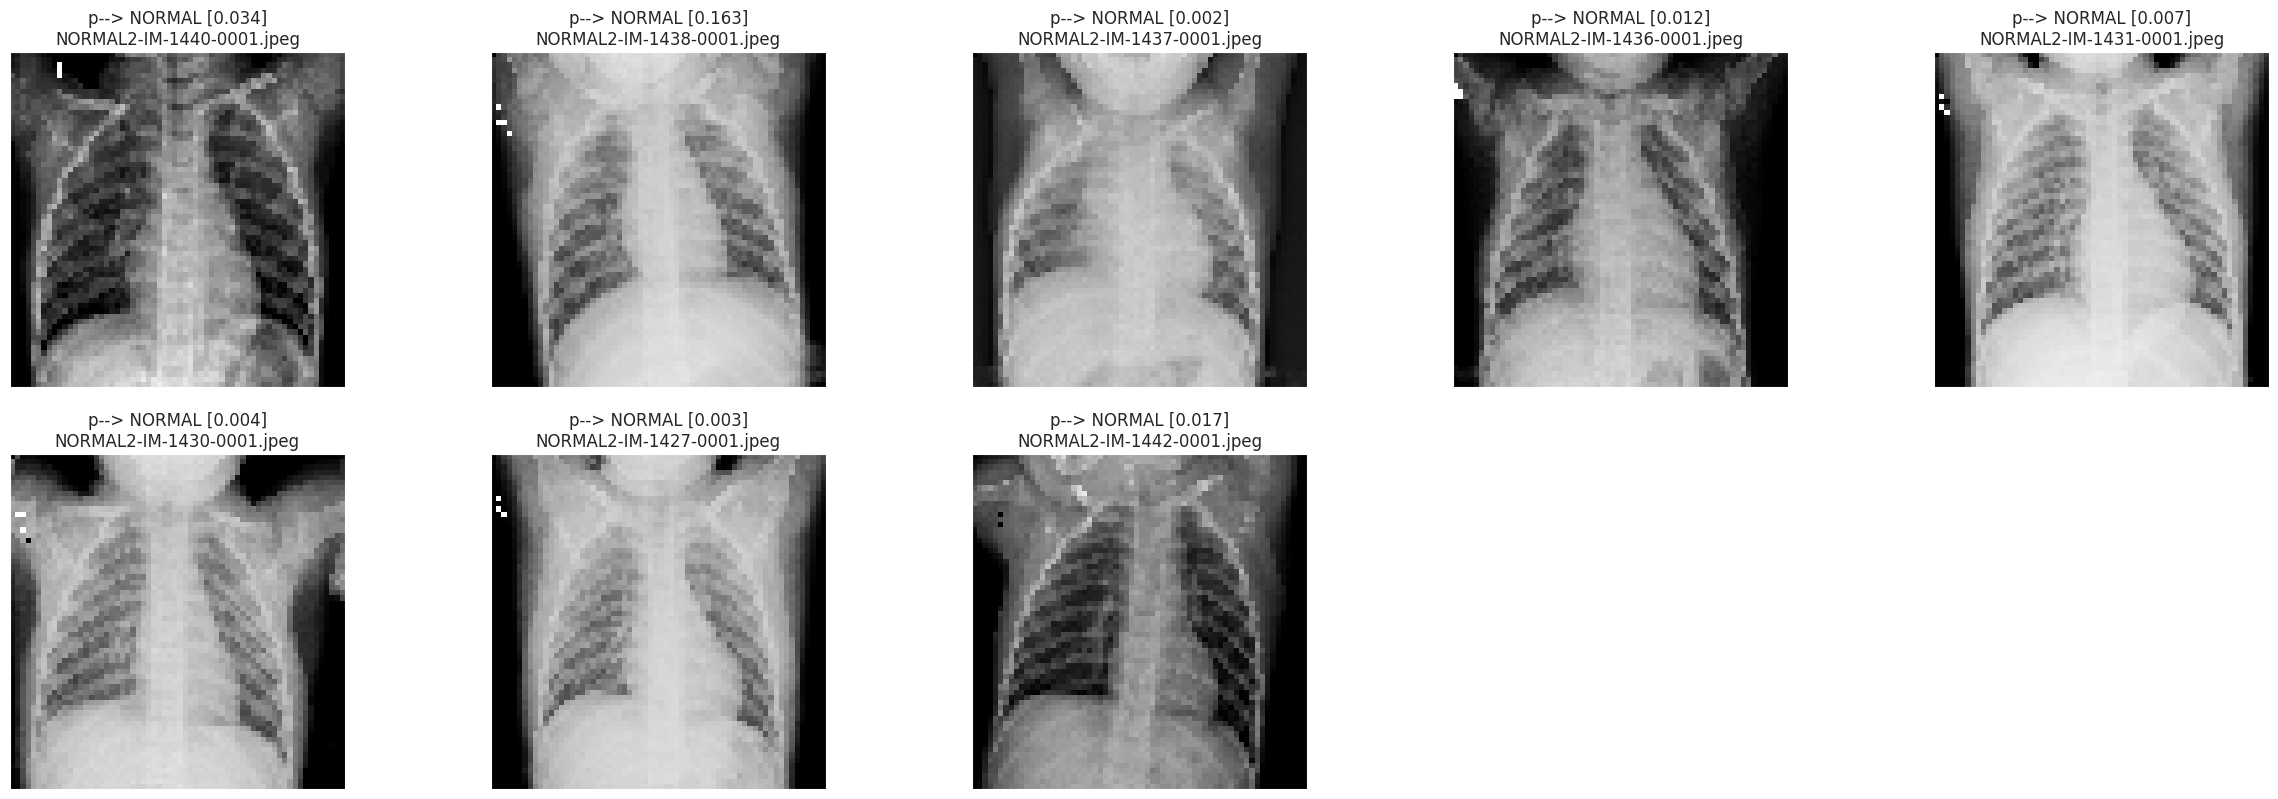

In [ ]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

ตัวอย่างการแปลผลในภาพ: p--> pneumonia [0.859] คือ ทำนายว่าเป็น pneumonia โดยมีความน่าจะเป็นอยู่ที่ 0.859 โดยที่ถ้าค่าความน่าจะเป็นมากกว่า 0.5 จะเป็น pneumonia ถ้าน้อยกว่า 0.5 จะเป็น normal



---



### VGG16 ปรับแต่งด้วย Fine-tune

#### Model

In [ ]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)

Trainable..
---
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


In [ ]:
vgg16_base_model.trainable = True # ปลดล็อกก่อน

# วนรอบปิด โดยให้เหลือส่วนท้ายไว้ จำนวน 7 ชั้น (สามารถลองค่าใด ๆ ได้ เช่น -4 -5 -6)
# นับจากท้ายของ base model ขึ้นมา
for layer in vgg16_base_model.layers[:-8]: #วนรอบ
    layer.trainable = False

# ตรวจสอบลิสรายชื่อ ชั้นที่สามารถ train ได้
for variable in model.trainable_variables:
    print(variable.name)

dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 14977089 (57.13 MB)
Trainable params: 262401 (1.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


ปกติการทำ Fine-tuning จะใช้ค่า Learning Rate น้อย ๆ หากกำหนดค่ำสูงไป อาจทำให้ค่า
ประสิทธิภาพแย่ลงกว่าการทำ Feature Extractor อย่างเดียว

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=1e-5) # learning rate

METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
        ]


model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=METRICS)

In [ ]:
import time
from keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

start = time.time()

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=2) # patience=2 หยุดตั้งแต่ 2 ครั้งแรกถ้าปรับแล้ว loss ไม่ดีขึ้นเลย
mc = ModelCheckpoint('VGG16_pneumonia2.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

history = model.fit(train_set, steps_per_epoch=len(train_set),
          epochs=20,
          validation_data=test_set,
          verbose=1,
          callbacks=[early_stop, mc])
          # class_weight=class_weights


end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
84/84 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9287 - precision: 0.9478 - recall: 0.9075
Epoch 1: val_accuracy improved from -inf to 0.87056, saving model to VGG16_pneumonia2.h5
84/84 [==============================] - 226s 3s/step - loss: 0.2024 - accuracy: 0.9287 - precision: 0.9478 - recall: 0.9075 - val_loss: 0.3408 - val_accuracy: 0.8706 - val_precision: 0.8401 - val_recall: 0.9224
Epoch 2/20
84/84 [==============================] - ETA: 0s - loss: 0.1984 - accuracy: 0.9243 - precision: 0.9317 - recall: 0.9157
Epoch 2: val_accuracy did not improve from 0.87056
84/84 [==============================] - 209s 2s/step - loss: 0.1984 - accuracy: 0.9243 - precision: 0.9317 - recall: 0.9157 - val_loss: 0.3390 - val_accuracy: 0.8706 - val_precision: 0.8401 - val_recall: 0.9224
Epoch 3/20
84/84 [==============================] - ETA: 0s - loss: 0.1892 - accuracy: 0.9246 - precision: 0.9246 - recall: 0.9246
Epoch 3: val_accuracy improved from 0.87056

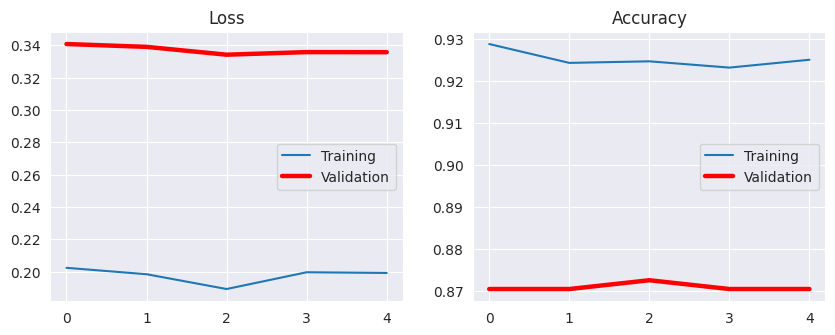

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [81]:
predict=model.evaluate(test_set)

15/15 [==============================] - 32s 2s/step - loss: 0.3342 - accuracy: 0.8727 - precision: 0.8898 - recall: 0.8571


#### ลองทำนายรูปจากทั้ง folder

ภาพที่จะลองมีทั้งหมด 16 ภาพ ประกอบด้วย normal มี 8 ภาพ และ pneumonia มี 8 ภาพ (มาจาก folder val ของชุดข้อมูลนี้)

In [82]:
from keras import models
from keras.models import Sequential, Model

model = models.load_model('/content/VGG16_pneumonia2.h5') # Load model มาใช้ต่อ

In [83]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_chest_xray(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:

        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0


        img_lst.append(img)

        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = 'PNEUMONIA' if y_pred_i > 0.5 else 'NORMAL' # threshold 0.5

        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

In [84]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/PNEUMONIA/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 73ms/step
person1952_bacteria_4883.jpeg | person1951_bacteria_4882.jpeg | person1954_bacteria_4886.jpeg | person1946_bacteria_4875.jpeg | person1947_bacteria_4876.jpeg | person1950_bacteria_4881.jpeg | person1949_bacteria_4880.jpeg | person1946_bacteria_4874.jpeg | 

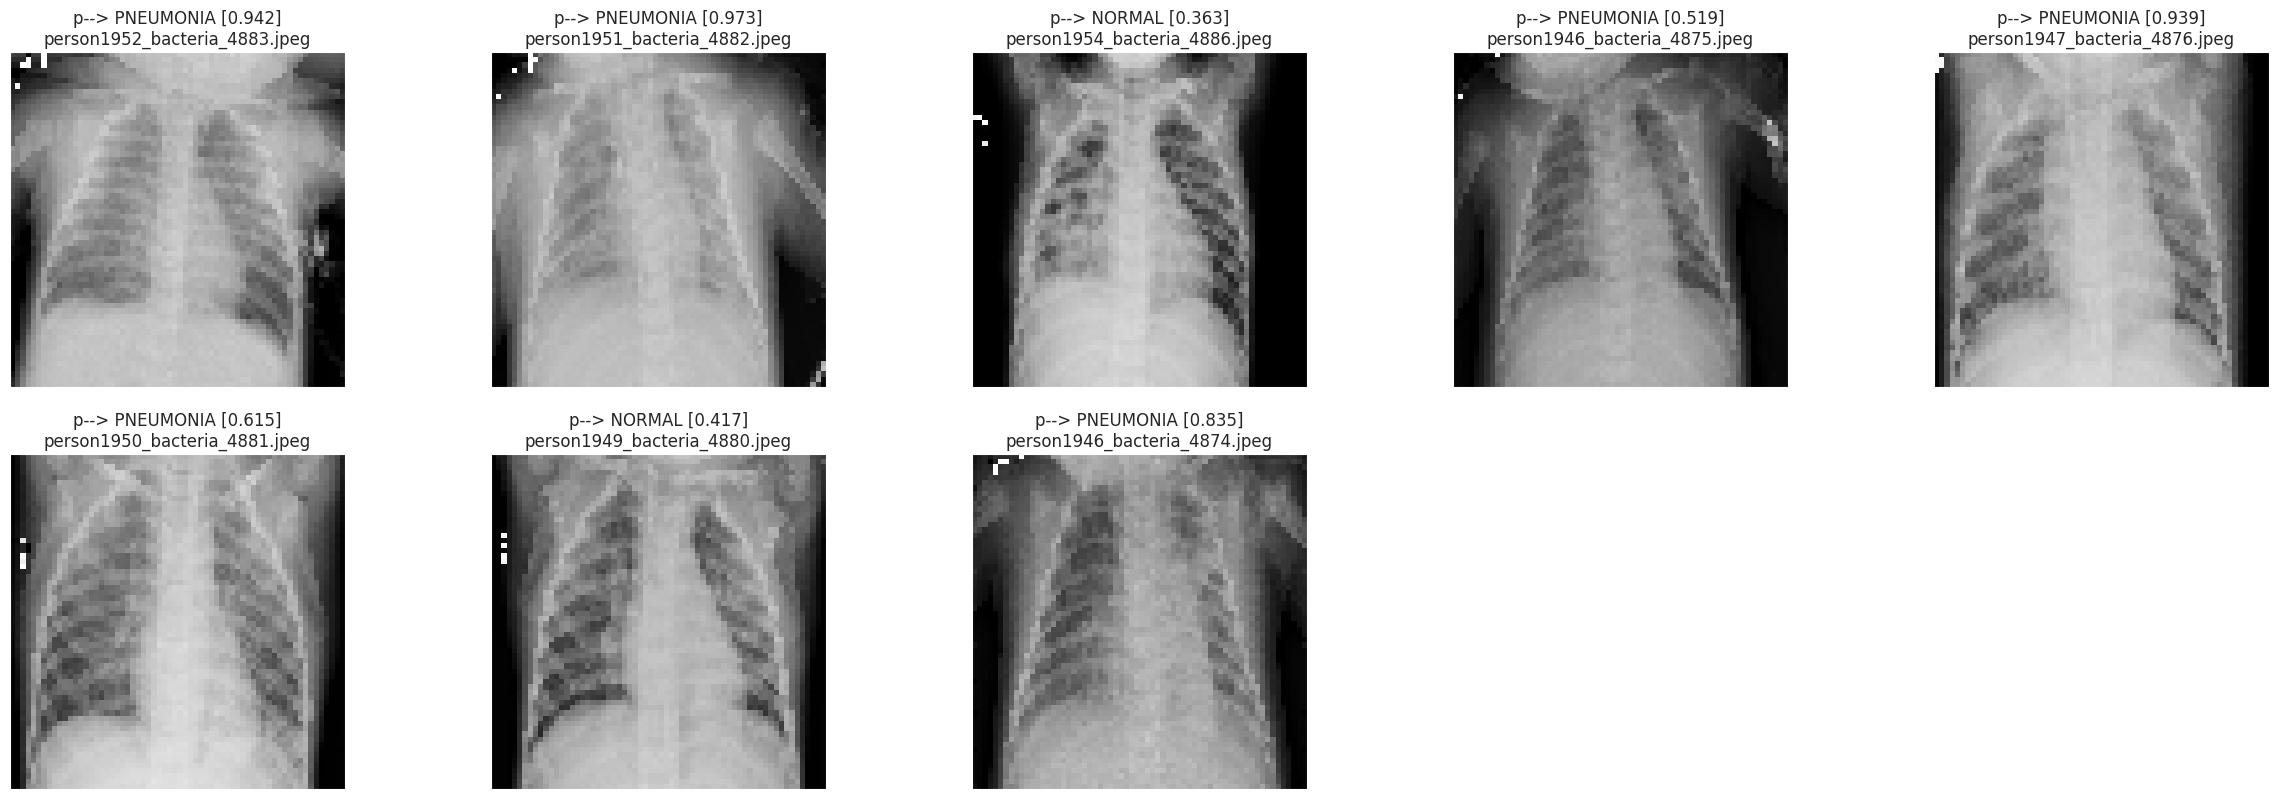

In [85]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

In [86]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/NORMAL/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 176ms/step
NORMAL2-IM-1440-0001.jpeg | NORMAL2-IM-1438-0001.jpeg | NORMAL2-IM-1437-0001.jpeg | NORMAL2-IM-1436-0001.jpeg | NORMAL2-IM-1431-0001.jpeg | NORMAL2-IM-1430-0001.jpeg | NORMAL2-IM-1427-0001.jpeg | NORMAL2-IM-1442-0001.jpeg | 

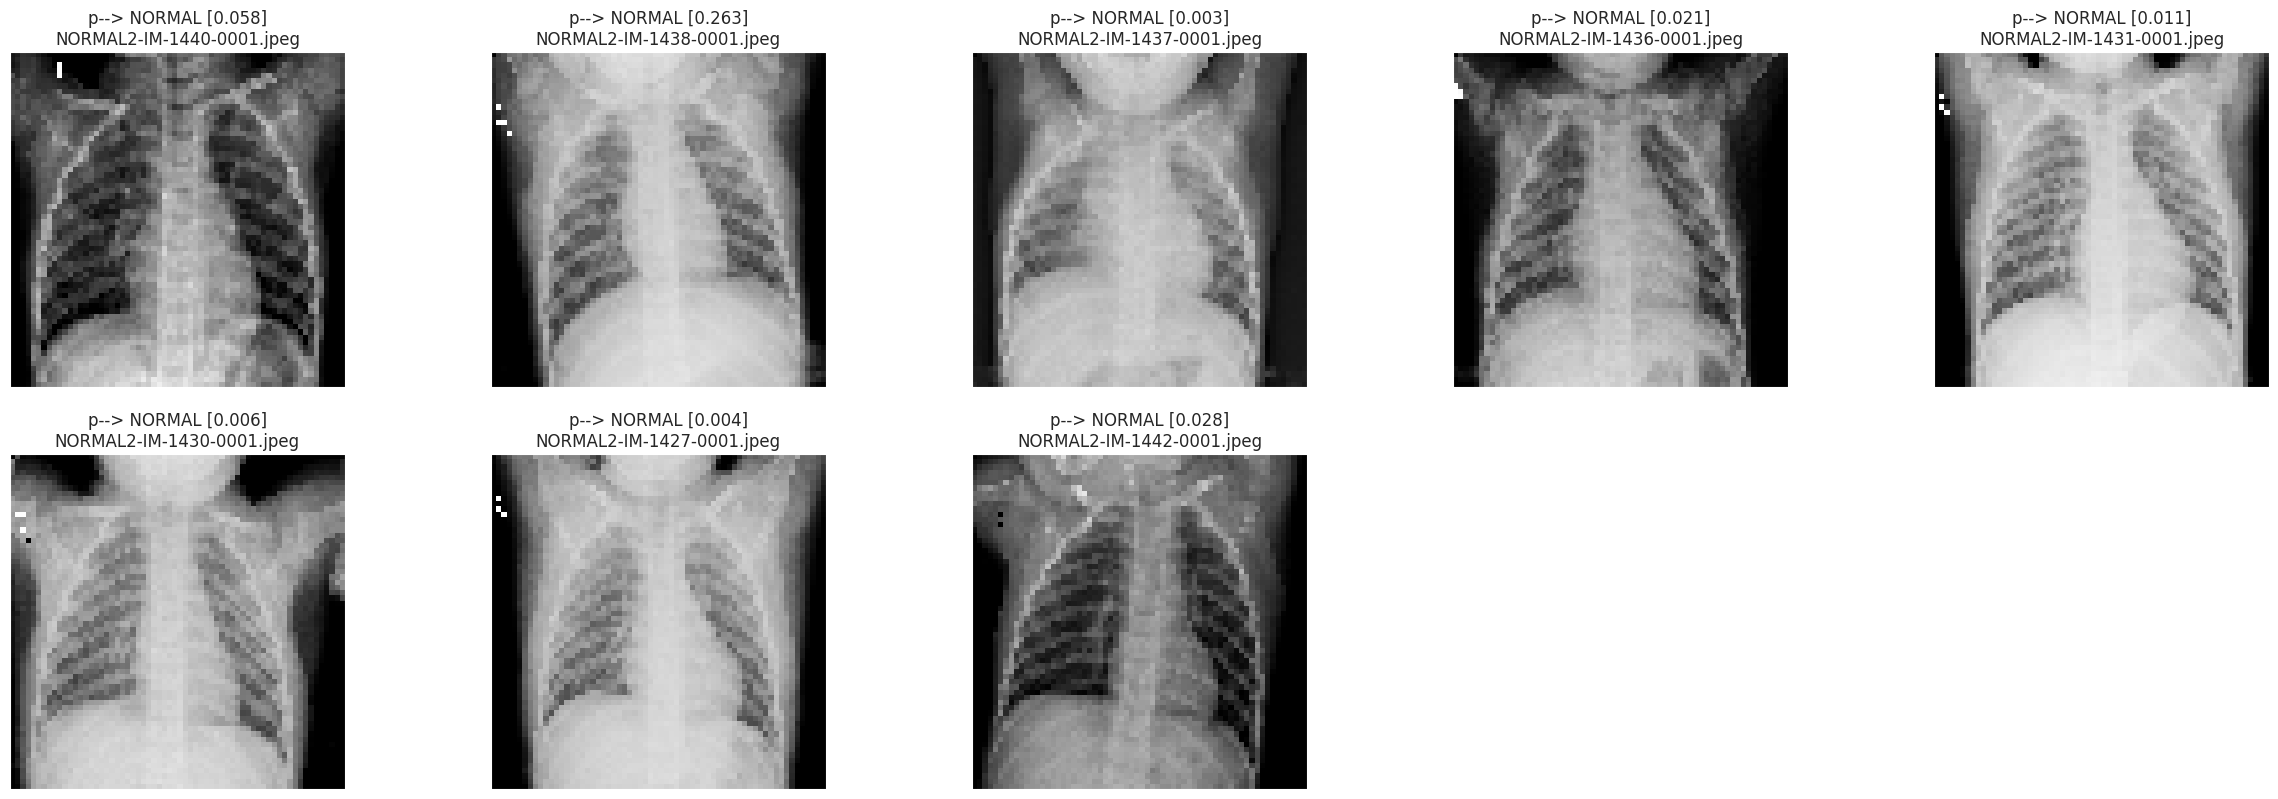

In [87]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()

ตัวอย่างการแปลผลในภาพ: p--> pneumonia [0.859] คือ ทำนายว่าเป็น pneumonia โดยมีความน่าจะเป็นอยู่ที่ 0.859 โดยที่ถ้าค่าความน่าจะเป็นมากกว่า 0.5 จะเป็น pneumonia ถ้าน้อยกว่า 0.5 จะเป็น normal



---



### ResNet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions